In [124]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import statsmodels.api as sm
import plotly.graph_objects as go

lowess = sm.nonparametric.lowess

In [70]:
data = []
a = datetime.timedelta(0)
wb = load_workbook('data.xlsx')
ws = wb.active
for row in range(2, ws.max_row+1):
    if ws.cell(row=row, column=1).value.microsecond <= 999999:
        a = datetime.timedelta(1/24/60/60/1000000) * (1000000 - ws.cell(row=row, column=1).value.microsecond)
        
    data.append([
        (ws.cell(row=row, column=1).value+a).replace(second=0),
        ws.cell(row=row, column=2).value,
        ws.cell(row=row, column=3).value,
        ws.cell(row=row, column=4).value,
    ])

In [87]:
df = pd.DataFrame(data, columns=['date', 'temp', 'hum', 'pres'])
df.index = df['date']
del df['date']

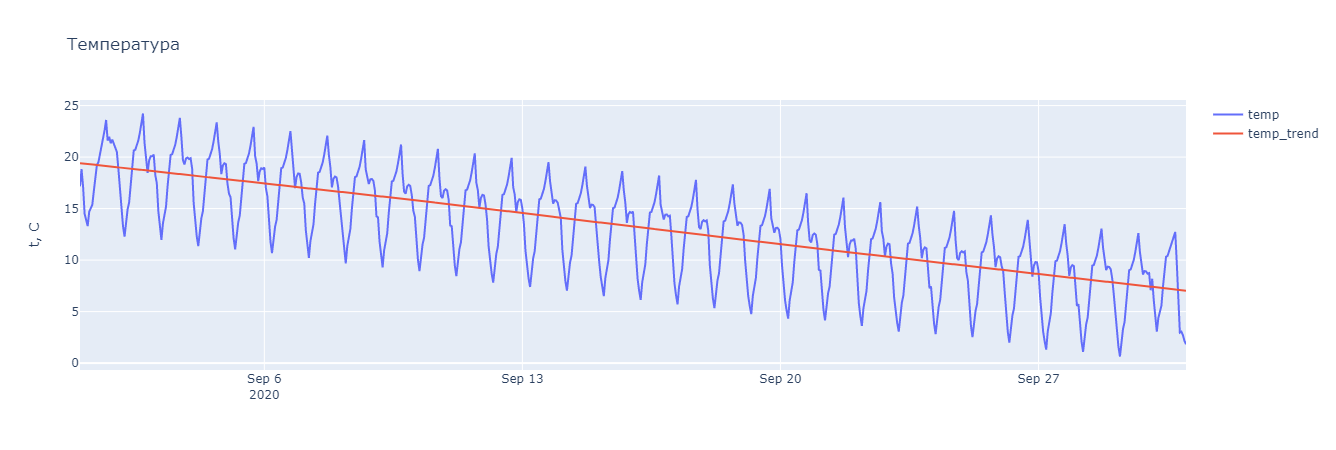

In [135]:
x = df.index
y = df.temp.values
name_line = 'temp'
name_plot = 'Температура'
name_y_axis = 't, C'
name_line_trend = name_line + '_trend'

trace1 = go.Scatter(x=x, y=y,
                    mode='lines',
                    name=name_line,
                    yaxis='y1', 
                   )

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

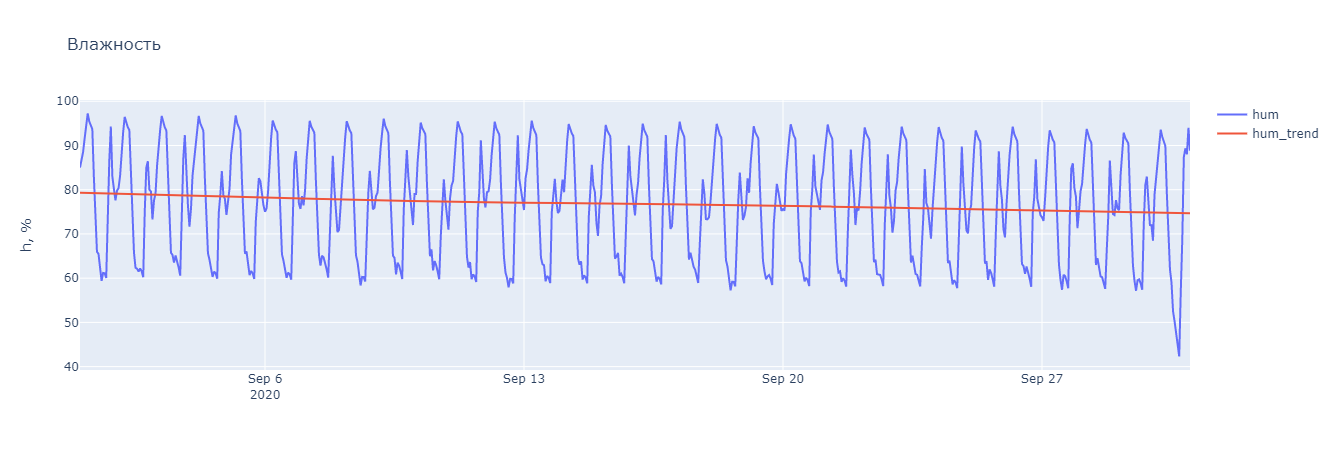

In [136]:
x = df.index
y = df.hum.values
name_line = 'hum'
name_plot = 'Влажность'
name_y_axis = 'h, %'
name_line_trend = name_line + '_trend'

trace1 = go.Scatter(x=x, y=y,
                    mode='lines',
                    name=name_line,
                    yaxis='y1', 
                   )

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

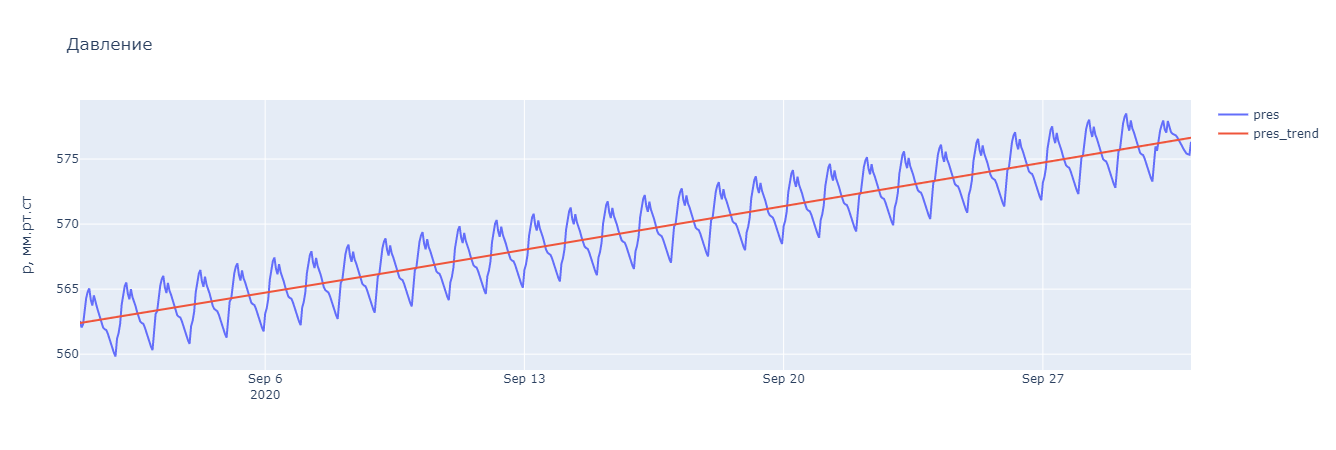

In [137]:
x = df.index
y = df.pres.values
name_line = 'pres'
name_plot = 'Давление'
name_y_axis = 'p, мм.рт.ст.'
name_line_trend = name_line + '_trend'

trace1 = go.Scatter(x=x, y=y,
                    mode='lines',
                    name=name_line,
                    yaxis='y1', 
                   )

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

In [155]:
l30_date = (datetime.datetime.today().replace(hour=1, minute=0, second=0, microsecond=0) - datetime.timedelta(30))
l30_df = df[df.index>=l30_date]
mean_by_day_df = l30_df.groupby(by=[l30_df.index.day]).mean()

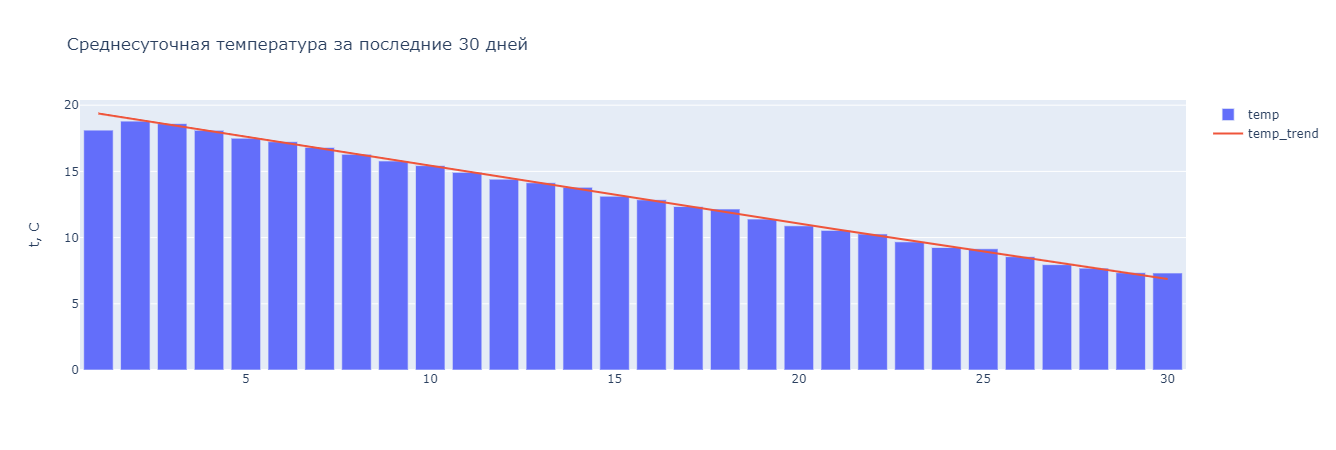

In [156]:
x = mean_by_day_df.index
y = mean_by_day_df.temp.values
name_line = 'temp'
name_plot = 'Среднесуточная температура за последние 30 дней'
name_y_axis = 't, C'
name_line_trend = name_line + '_trend'

trace1 = go.Bar(x=x, y=y, name=name_line, yaxis='y1')

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

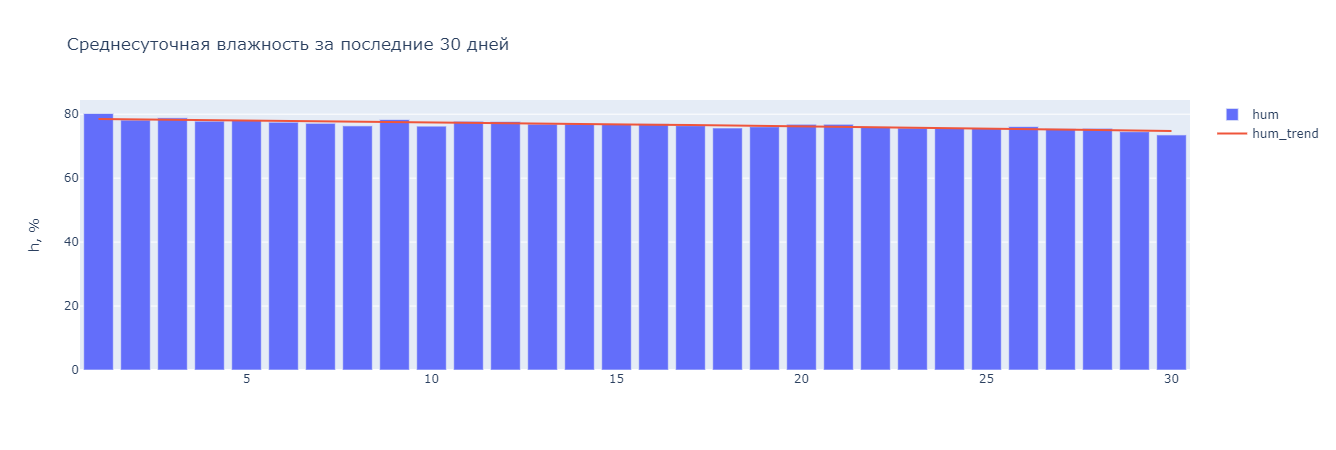

In [157]:
x = mean_by_day_df.index
y = mean_by_day_df.hum.values
name_line = 'hum'
name_plot = 'Среднесуточная влажность за последние 30 дней'
name_y_axis = 'h, %'
name_line_trend = name_line + '_trend'

trace1 = go.Bar(x=x, y=y, name=name_line, yaxis='y1')

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

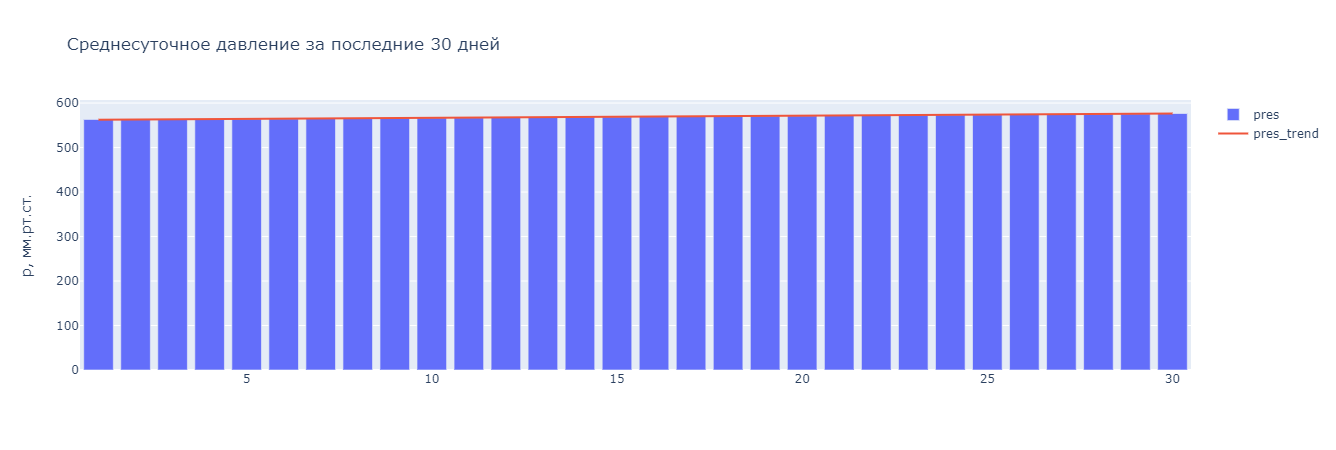

In [158]:
x = mean_by_day_df.index
y = mean_by_day_df.pres.values
name_line = 'pres'
name_plot = 'Среднесуточное давление за последние 30 дней'
name_y_axis = 'p, мм.рт.ст.'
name_line_trend = name_line + '_trend'

trace1 = go.Bar(x=x, y=y, name=name_line, yaxis='y1')

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

In [161]:
mean_by_hour_df = l30_df.groupby(by=[l30_df.index.hour]).mean()

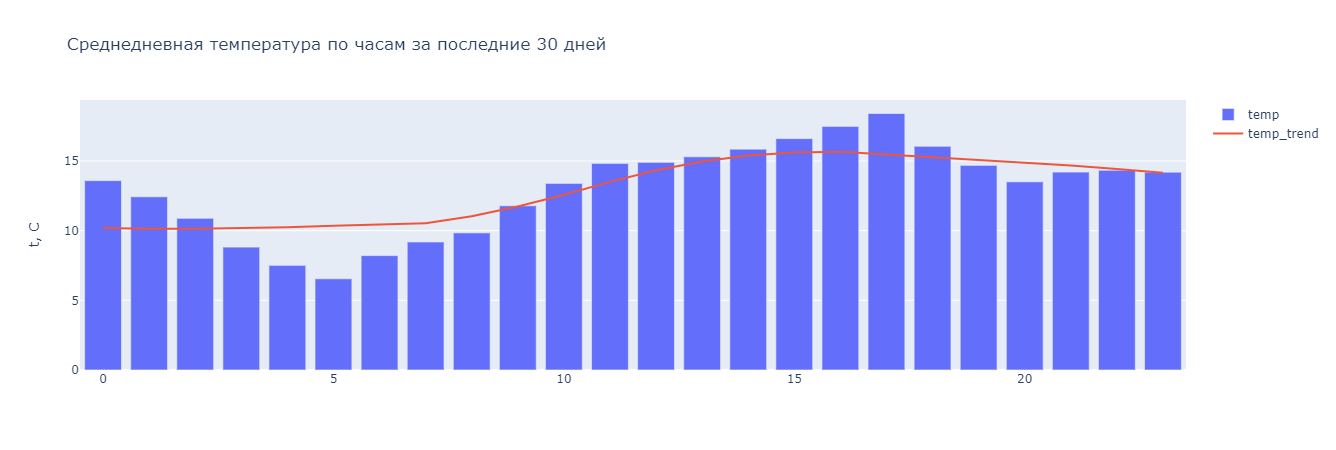

In [162]:
x = mean_by_hour_df.index
y = mean_by_hour_df.temp.values
name_line = 'temp'
name_plot = 'Среднедневная температура по часам за последние 30 дней'
name_y_axis = 't, C'
name_line_trend = name_line + '_trend'

trace1 = go.Bar(x=x, y=y, name=name_line, yaxis='y1')

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

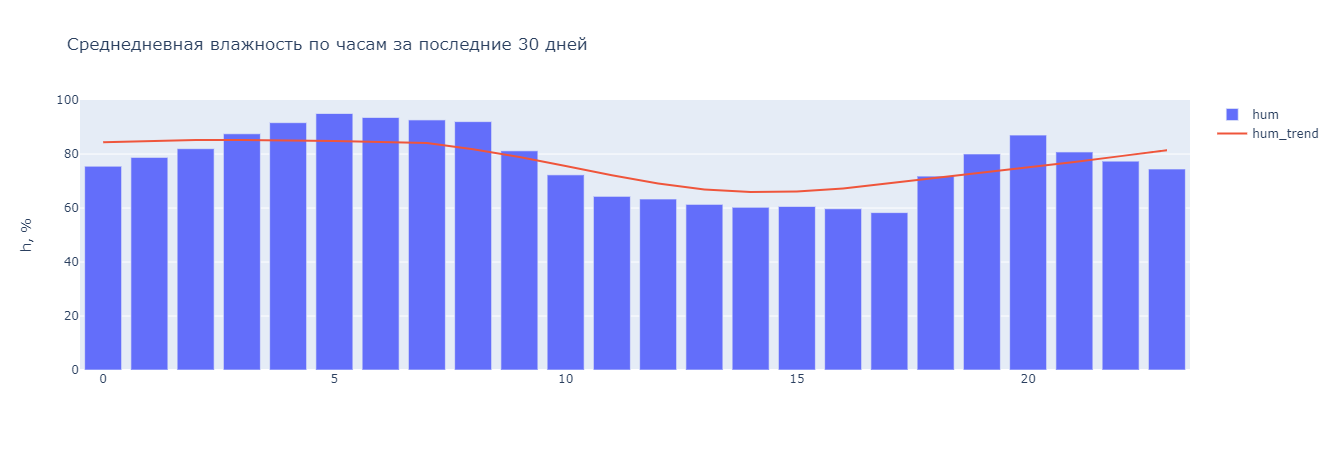

In [164]:
x = mean_by_hour_df.index
y = mean_by_hour_df.hum.values
name_line = 'hum'
name_plot = 'Среднедневная влажность по часам за последние 30 дней'
name_y_axis = 'h, %'
name_line_trend = name_line + '_trend'

trace1 = go.Bar(x=x, y=y, name=name_line, yaxis='y1')

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()

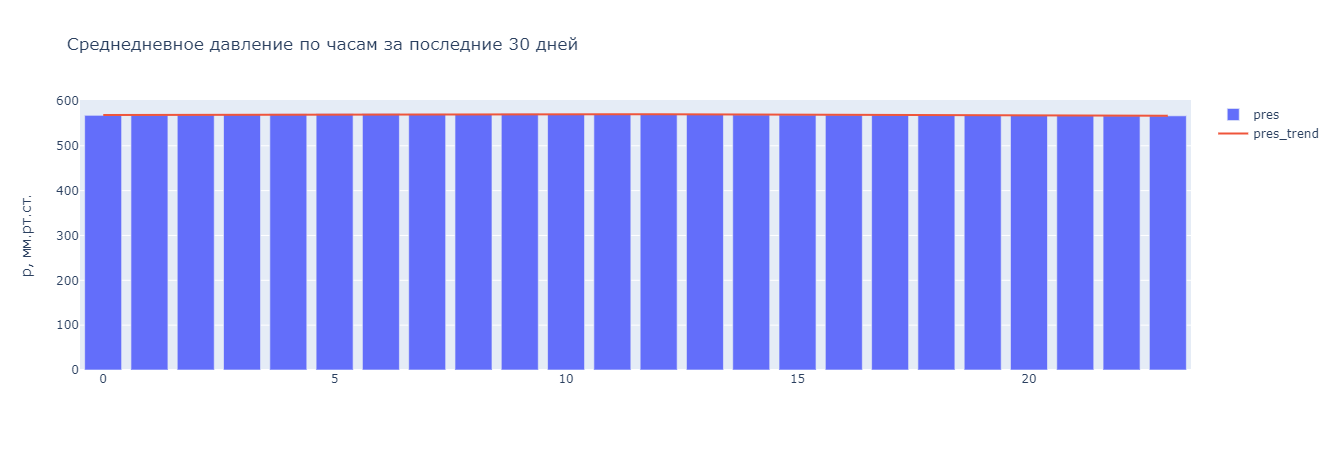

In [166]:
x = mean_by_hour_df.index
y = mean_by_hour_df.pres.values
name_line = 'pres'
name_plot = 'Среднедневное давление по часам за последние 30 дней'
name_y_axis = 'p, мм.рт.ст.'
name_line_trend = name_line + '_trend'

trace1 = go.Bar(x=x, y=y, name=name_line, yaxis='y1')

trace2 = go.Scatter(x=x, y=lowess(y, x)[:, 1].round(2),
                    mode='lines',
                    name=name_line_trend,
                    yaxis='y1'
                   )

data_fig = [trace1, trace2]
layout = go.Layout(title=name_plot,
                   yaxis=dict(title=name_y_axis),
                  )

fig = go.Figure(data=data_fig, layout=layout)
fig.show()